## Calculate NIRv from NIR and NDVI

In this notebook, previously prepared NDVI and NIR data is used to calculate monthly mean NIRv values. The following steps are included:
- Use AVHRR and MODIS NDVI and NIR data that has been quality filtered and cropped to NL / BL forest area
- Calculate monthly mean values for each pixel
- Calculate monthly mean NIRv per pixel as an product of NIR and NDVI

The calculated NIRv will be used to calculate the GPP later on.

In [ ]:
# import libraries
import os
import glob
import xarray as xr
import numpy as np
import pandas as pd

In [2]:
# set working directory
os.chdir("E:/Master/Thesis/3_Data")
print("Current working directory: {0}".format(os.getcwd()))

Current working directory: E:\Master\Thesis\3_Data


In [3]:
# create list with forest types
forest_types = ("NL", "BL")

In [ ]:
# first, calculate NIRv from AVHRR NIR and NDVI data
# process year-wise

for year in range(1981, 2000):
    
    # process needleleaved and broadleaved forest
    for f in range(len(forest_types)):
        forest_type = forest_types[f]

        # get all NDVI files of according year that belong to forest type
        directory = f"./NDVI/Daily/{year}"
        filelist = glob.glob(os.path.join(directory, f"*{forest_type}*.nc"))

        # open netCDF dataset of corresponding year with all daily datasets concatenated
        ndvi = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

        # calculate monthly mean values
        ndvi_mon_mean = ndvi.resample(time="1MS", skipna=True).mean("time")

        # get all NIR files of according year that belong to forest type
        directory = f"./NIR/Daily/{year}"
        filelist = glob.glob(os.path.join(directory, f"*{forest_type}*.nc"))

        # open netCDF dataset of corresponding year with all daily datasets concatenated
        nir = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

        # calculate monthly mean values
        nir_mon_mean = nir.resample(time="1MS", skipna=True).mean("time")

        # calculate NIRv from NDVI and NIR
        nirv_mon_mean = ((ndvi_mon_mean.NDVI - 0.08) * nir_mon_mean.NIR).rename("NIRv")

        # compress data to reduce size
        comp = dict(zlib=True, complevel=4)
        nirv_mon_mean.encoding.update(comp)

        # save created datasets as netCDF4 files
        nirv_mon_mean.to_netcdf(f"./NIRv/Monthly/NIRv_mon_mean_{year}_{forest_type}.nc")

In [ ]:
# now, follow the same steps to calculate NIRv from MODIS NIR and NDVI data

for year in range(2000, 2025):
    
    # process needleleaved and broadleaved forest
    for f in range(len(forest_types)):
        forest_type = forest_types[f]

        # get all NDVI files of according year that belong to forest type
        directory = f"./NDVI/16Daily/{year}"
        filelist = glob.glob(os.path.join(directory, f"*{forest_type}*.nc"))

        # open netCDF dataset of corresponding year with all daily datasets concatenated
        ndvi = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

        # calculate monthly mean values
        ndvi_mon_mean = ndvi.resample(time="1MS", skipna=True).mean("time")

        # get all NIR files of according year that belong to forest type
        directory = f"./NIR/8Daily/{year}"
        filelist = glob.glob(os.path.join(directory, f"*{forest_type}*.nc"))

        # open netCDF dataset of corresponding year with all daily datasets concatenated
        nir = xr.open_mfdataset(filelist, concat_dim="time", combine="nested", engine="netcdf4")

        # calculate monthly mean values
        nir_mon_mean = nir.resample(time="1MS", skipna=True).mean("time")

        # calculate NIRv from NDVI and NIR
        nirv_mon_mean = ((ndvi_mon_mean.NDVI - 0.08) * nir_mon_mean.NIR).rename("NIRv")

        # compress data to reduce size
        comp = dict(zlib=True, complevel=4)
        nirv_mon_mean.encoding.update(comp)

        # save created datasets as netCDF4 files
        nirv_mon_mean.to_netcdf(f"./NIRv/Monthly/NIRv_mon_mean_{year}_{forest_type}.nc")

In [ ]:
# look at exemplary datasets to get an overview
nirv_mon_mean

<xarray.DataArray 'GPP' (time: 12, lat: 2952, lon: 3510)> Size: 995MB
dask.array<mul, shape=(12, 2952, 3510), dtype=float64, chunksize=(1, 1476, 1755), chunktype=numpy.ndarray>
Coordinates:
    crs          int8 1B -127
    spatial_ref  int64 8B 0
  * lon          (lon) float64 28kB 5.451 5.454 5.457 5.46 ... 15.19 15.2 15.2
  * lat          (lat) float64 24kB 55.2 55.2 55.19 55.19 ... 47.01 47.0 47.0
  * time         (time) datetime64[ns] 96B 2024-01-01 2024-02-01 ... 2024-12-01

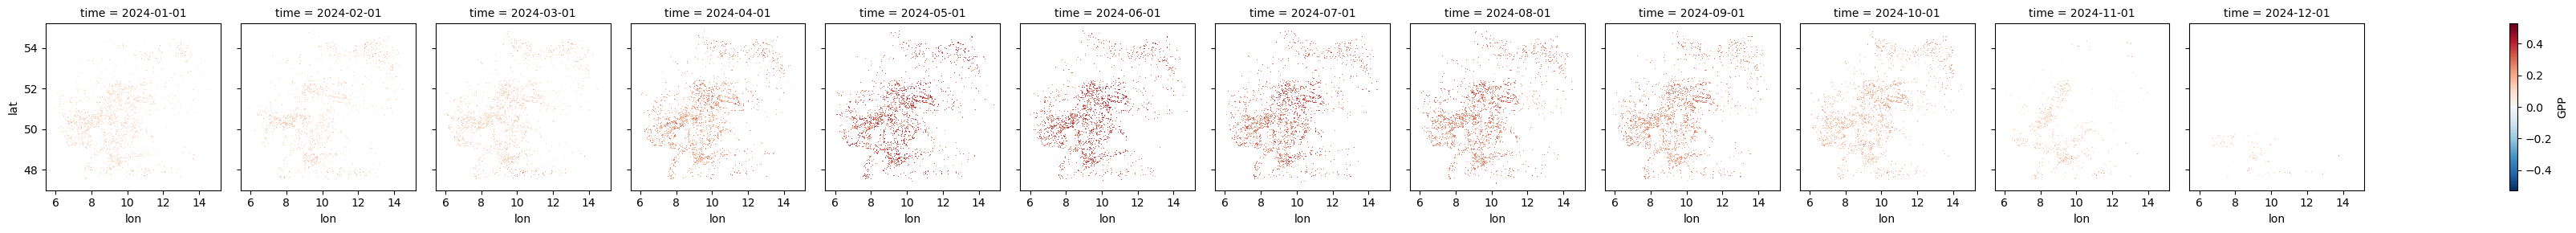

In [ ]:
nirv_mon_mean.sel(time = slice('2024-01', '2024-12')).plot(col="time")

In [ ]:
nirv_year_mean

<xarray.DataArray 'GPP' (time: 1, lat: 2952, lon: 3510)> Size: 83MB
dask.array<mul, shape=(1, 2952, 3510), dtype=float64, chunksize=(1, 1476, 1755), chunktype=numpy.ndarray>
Coordinates:
    crs          int8 1B -127
    spatial_ref  int64 8B 0
  * lon          (lon) float64 28kB 5.451 5.454 5.457 5.46 ... 15.19 15.2 15.2
  * lat          (lat) float64 24kB 55.2 55.2 55.19 55.19 ... 47.01 47.0 47.0
  * time         (time) datetime64[ns] 8B 2024-01-01

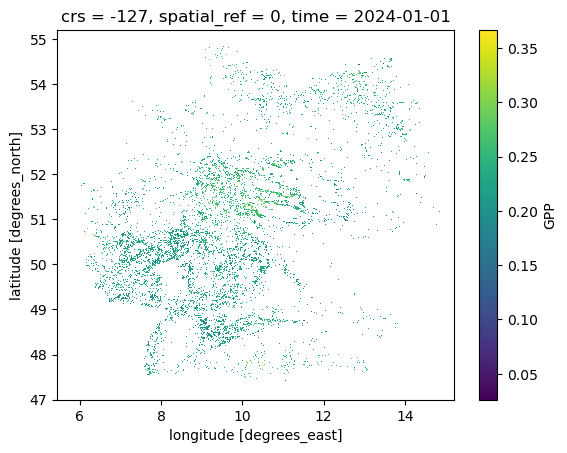

In [ ]:
nirv_year_mean.plot()